In [108]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
month_code = ['1609459200', '1612137600', '1614556800', '1617235200','1619827200', '1622505600', '1625097600','1627776000', '1630454400', '1633046400', '1635724800', '1638316800', 
              '1640995200', '1643673600', '1646092800', '1648771200', '1651363200', '1654041600']
topics = ['howto', 'education', 'science', 'all']

viewed_url = ['https://playboard.co/youtube-ranking/most-viewed-','-channels-in-south-korea-monthly?period=']
total_popular_url = 'https://playboard.co/youtube-ranking/most-popular-all-channels-in-south-korea-monthly?period='

for topic in topics:
    print(topic.join(viewed_url)+month_code[0])
    
print(total_popular_url+month_code[0])

https://playboard.co/youtube-ranking/most-viewed-howto-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-education-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-science-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-viewed-all-channels-in-south-korea-monthly?period=1609459200
https://playboard.co/youtube-ranking/most-popular-all-channels-in-south-korea-monthly?period=1609459200


In [186]:
def get_top_viewed(url,df_dict, rank = 1):
#     print(url)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    tabel = soup.select_one('table.sheet > tbody')
    
    if tabel == None:
        for i in range(rank):
            df_dict['순위'].append(0)
            df_dict['채널명'].append(np.nan)
            df_dict['태그'].append([])
            df_dict['조회수'].append(np.nan)
    else:
        trs = tabel.select('tr.chart__row')
        r = 0
        while True:
            tr = trs[r]
            name = np.nan
            tags = []
            month_rank = 0
            viewed = np.nan

            try:
                name = tr.find('h3').text
                tag_lis = tr.select('ul.name__tags > li.ttags__item')
                for tag_li in tag_lis:
                    tags.append(tag_li.text)
                month_rank = tr.select_one('div.current').text
                viewed = tr.select_one('td.score').text
                viewed = float(viewed.replace(',',''))
            except:
                print('ad')
                r += 1
                continue

            df_dict['순위'].append(month_rank)
            df_dict['채널명'].append(name)
            df_dict['태그'].append(tags)
            df_dict['조회수'].append(viewed)

            if int(month_rank) == rank:
                break
            r += 1
    return df_dict


def get_top_popular(url,df_dict, rank = 1):
#     print(url)
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    tabel = soup.select_one('table.sheet > tbody')
    
    trs = tabel.select('tr.chart__row')
    if trs == None:
        trs= [None]
    r = 0
    
    while True:
        tr = trs[r]

        name = np.nan
        tags = []
        month_rank = 0
        viewed = np.nan
        likes = np.nan
        
        try:
            name = tr.find('h3').text
            tag_lis = tr.select('ul.name__tags > li.ttags__item')
            for tag_li in tag_lis:
                tags.append(tag_li.text)
            month_rank = tr.select_one('div.current').text

            score_tds = tr.select('td.score')
            viewed = score_tds[0].select_one('span').text
            viewed = float(viewed.replace(',',''))

            likes = score_tds[1].select_one('span').text
        except:
            print('ad')
            r += 1
            continue
                
        df_dict['순위'].append(month_rank)
        df_dict['채널명'].append(name)
        df_dict['태그'].append(tags)
        df_dict['조회수'].append(viewed)
        df_dict['likes'].append(likes)
        
        if int(month_rank) == rank:
            break
        r += 1
    return df_dict

In [184]:
df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[], 'likes':[]} 
for mon in month_code:
#     print(month_code.index(mon), end = ': ')
    df_dict = get_top_popular(total_popular_url+mon,df_dict)

top_popular_df = pd.DataFrame(df_dict, index = pd.period_range('2021-01-01','2022-06-30',freq = 'm').to_list())
top_popular_df

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-02,1,BANGTANTV,"[ #BTS , #방탄 ]",82683282.0,1.8천만
2021-03,1,BLACKPINK,"[ #YG , #와이지 ]",253043478.0,2.1천만
2021-04,1,BANGTANTV,"[ #BTS , #방탄 ]",142585706.0,2.6천만
2021-05,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",442902465.0,3.5천만
2021-06,1,BANGTANTV,"[ #BTS , #방탄 ]",288032959.0,3.7천만
2021-07,1,BANGTANTV,"[ #BTS , #방탄 ]",486782715.0,7.4천만
2021-08,1,쇼츠갤러리,[],425145879.0,2.4백만
2021-09,1,BLACKPINK,"[ #YG , #와이지 ]",448201000.0,3.6천만
2021-10,1,BLACKPINK,"[ #YG , #와이지 ]",210293347.0,9백만


[Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-01', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-02', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-03', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),
 Period('2021-04', 'M'),


In [203]:

df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[], 'likes':[]} 
for mon in month_code:
#     print(month_code.index(mon), end = ': ')
    df_dict = get_top_popular(total_popular_url+mon,df_dict, rank = 10)

ind = pd.period_range('2021-01-01','2022-06-30',freq = 'm').to_list()*10
top_20_popular_df = pd.DataFrame(df_dict, index = sorted(ind))
top_20_popular_df

ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad


,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
...,...,...,...,...,...
2022-06,6,JTBC News,"[ #JTBC , #NEWS ]",221182021.0,1.7백만
2022-06,7,SBS 뉴스,"[ #SBSNEWS , #sbs ]",189110878.0,1.2백만
2022-06,8,진성호방송,"[ #인물 , #사회 ]",74573992.0,4.9백만
2022-06,9,뚝딱 상식 뚝배기,"[ #상식 , #미스터리 ]",90622336.0,2.6백만


In [204]:
top_20_popular_df[:20]

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
2021-01,6,Stop Motion Cooking,"[ #cooking , #asmr ]",112447275.0,8천
2021-01,7,SBS 뉴스,"[ #SBSNEWS , #sbs ]",91520561.0,72만
2021-01,8,배승희 변호사,"[ #bae seung hee lawyer , #배승희 ]",40858699.0,5.5백만
2021-01,9,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",38642488.0,5.5백만
2021-01,10,YTN,"[ #YTN , #LIVE ]",83309188.0,66.8만


In [187]:
viewed_dfs = {}
for topic in topics:
    print('-'*30, '\n', topic, ':')
    df_dict ={'순위':[], '채널명':[], '태그':[], '조회수':[]} 
    for mon in month_code:
#         print(month_code.index(mon), end = ': ')
        df_dict = get_top_viewed(topic.join(viewed_url)+mon, df_dict)
#         print('채널명 : {0:10}, 태그 : {1}, 조회수 : {2:10}'.format(values[0], values[1], values[2]))

    viewed_df = pd.DataFrame(df_dict, index = pd.period_range('2021-01-01','2022-06-30',freq = 'm'))
    viewed_dfs[topic] = viewed_df
viewed_dfs[topics[0]]

------------------------------ 
 howto :
------------------------------ 
 education :
------------------------------ 
 science :
------------------------------ 
 all :


,순위,채널명,태그,조회수
2021-01,0,NaN,[],NaN
2021-02,0,NaN,[],NaN
2021-03,0,NaN,[],NaN
2021-04,0,NaN,[],NaN
2021-05,1,Yummy Waffle 야미와플,"[ #Yummy , #Waffle ]",38935630.0
2021-06,1,YogaHoliday,"[ #yogatoday , #yoga massage ]",110946503.0
2021-07,1,YogaHoliday,"[ #yogatoday , #yoga massage ]",65970402.0
2021-08,1,ROOKIE MING 루키밍,"[ #slime , #rookieming ]",69415860.0
2021-09,1,ROOKIE MING 루키밍,"[ #slime , #rookieming ]",70017273.0
2021-10,1,쇼츠갤러리 tiktok,"[ #웃긴영상 , #동물 ]",114418328.0


In [188]:
viewed_dfs[topics[1]]

,순위,채널명,태그,조회수
2021-01,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",136648367.0
2021-02,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",72135733.0
2021-03,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",97339243.0
2021-04,1,스위트티비 SweetTV,"[ #장난감 , #놀이 ]",108905985.0
2021-05,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",58035190.0
2021-06,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",49414221.0
2021-07,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",66542989.0
2021-08,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",98427573.0
2021-09,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",82265447.0
2021-10,1,핑크퐁 (인기 동요・동화),"[ #핑크퐁 , #pinkfong ]",94481365.0


In [191]:
viewed_dfs[topics[2]]

,순위,채널명,태그,조회수
2021-01,1,Samsung,"[ #samsung , #mobile ]",139915851.0
2021-02,1,Samsung,"[ #samsung , #mobile ]",21373247.0
2021-03,1,Samsung,"[ #samsung , #mobile ]",67158587.0
2021-04,1,Samsung,"[ #samsung , #mobile ]",72171001.0
2021-05,1,Samsung,"[ #samsung , #mobile ]",42711664.0
2021-06,1,Samsung,"[ #samsung , #mobile ]",30394049.0
2021-07,1,ITSub잇섭,"[ #it , #전자제품 ]",18976829.0
2021-08,1,새로운거신기한거재밌는거 NewAmazingFun,"[ #신기한거 , #새로운거 ]",147895228.0
2021-09,1,새로운거신기한거재밌는거 NewAmazingFun,"[ #신기한거 , #새로운거 ]",75538531.0
2021-10,1,Samsung,"[ #samsung , #mobile ]",113259374.0


In [192]:
viewed_dfs[topics[3]]

,순위,채널명,태그,조회수
2021-01,1,BLACKPINK,"[ #YG , #와이지 ]",602459523.0
2021-02,1,BLACKPINK,"[ #YG , #와이지 ]",486769203.0
2021-03,1,BLACKPINK,"[ #YG , #와이지 ]",730292850.0
2021-04,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",631260181.0
2021-05,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",956989989.0
2021-06,1,HYBE LABELS,"[ #HYBE , #HYBE LABELS ]",701819165.0
2021-07,1,BANGTANTV,"[ #BTS , #방탄 ]",891562499.0
2021-08,1,BANGTANTV,"[ #BTS , #방탄 ]",598802040.0
2021-09,1,BLACKPINK,"[ #YG , #와이지 ]",820595696.0
2021-10,1,BLACKPINK,"[ #YG , #와이지 ]",696333772.0


In [193]:
topics

['howto', 'education', 'science', 'all']

In [194]:
view_top_path = './topic_view_top1/'
for topic in topics:
    viewed_dfs[topic].to_csv(view_top_path + f'{topic}_view_top.csv', encoding = 'utf-8', index = True)

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.style.use('ggplot')



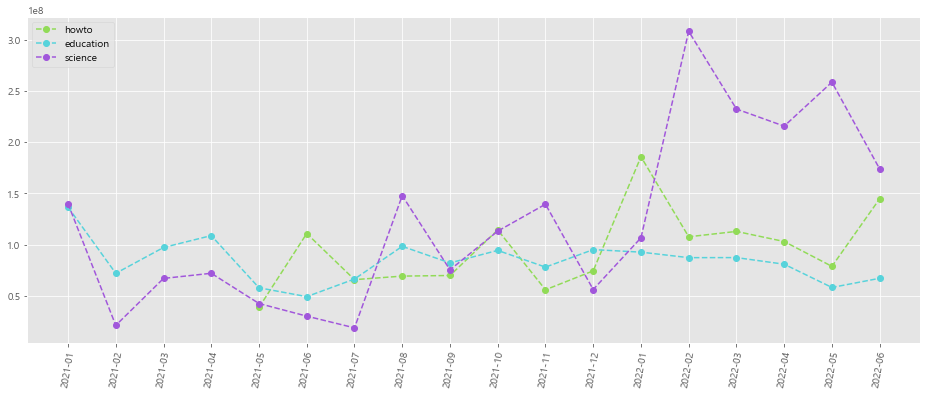

In [232]:
colors = sns.color_palette('hls', 4)
    
plt.figure(figsize=(16,6))
plt.xticks(range(len(viewed_dfs[topics[-1]].index)), viewed_dfs[topics[-1]].index, rotation=80)
    
for topic in topics[:-1]:
    plt.plot(range(18),viewed_dfs[topic]['조회수'],
             'o--', color = colors[topics.index(topic)+1])

# plt.bar(range(18), viewed_dfs[topics[-1]]['조회수'], alpha = 0.5, color = colors[0])


plt.legend(topics,loc = 2)

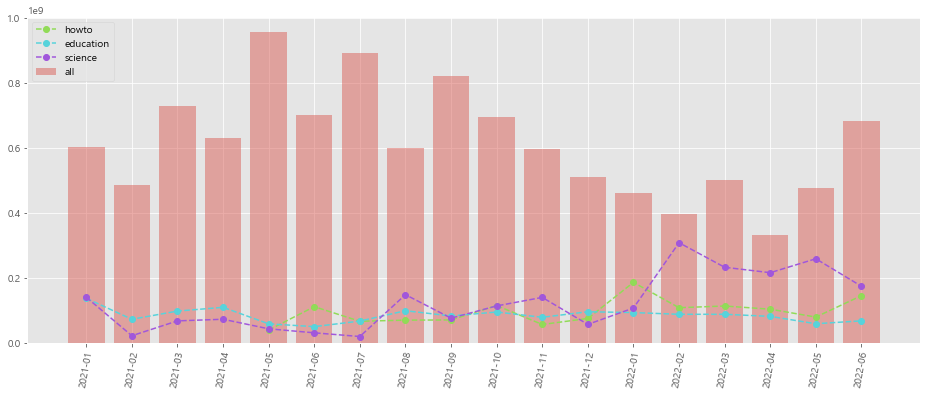

In [230]:
colors = sns.color_palette('hls', 4)
    
plt.figure(figsize=(16,6))
plt.xticks(range(len(viewed_dfs[topics[-1]].index)), viewed_dfs[topics[-1]].index, rotation=80)
    
for topic in topics[:-1]:
    plt.plot(range(18),viewed_dfs[topic]['조회수'],
             'o--', color = colors[topics.index(topic)+1])

plt.bar(range(18), viewed_dfs[topics[-1]]['조회수'], alpha = 0.5, color = colors[0])


plt.legend(topics,loc = 2)

전체 분석

In [266]:
# 조원들이 크롤링한 자료 불러오기
import os 
for f_name in os.listdir(view_top_path):
    

['all_view_top.csv',
 'animals_view_top.csv',
 'baking.csv',
 'body-building.csv',
 'camping.csv',
 'cat.csv',
 'cooking.csv',
 'cover-dance.csv',
 'cover-song.csv',
 'dog.csv',
 'education_view_top.csv',
 'fashion.csv',
 'gaming_view_top.csv',
 'home_workout.csv',
 'howto_view_top.csv',
 'lookbook.csv',
 'makeup.csv',
 'mukbang.csv',
 'music_view_top.csv',
 'news_view_top.csv',
 'science_view_top.csv',
 'sneakers_view_top.csv',
 'stocks.csv',
 'trucker_view_top.csv',
 'v-tuber_view_top.csv']

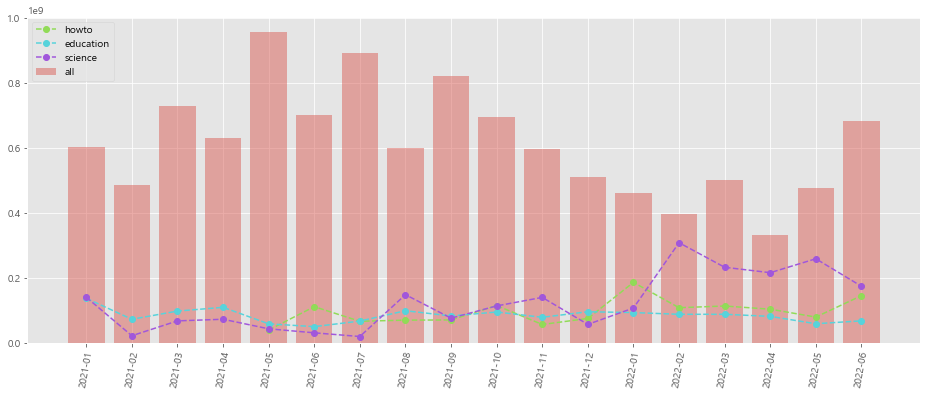

In [230]:
colors = sns.color_palette('hls', 4)
    
plt.figure(figsize=(16,6))
plt.xticks(range(len(viewed_dfs[topics[-1]].index)), viewed_dfs[topics[-1]].index, rotation=80)
    
for topic in topics[:-1]:
    plt.plot(range(18),viewed_dfs[topic]['조회수'],
             'o--', color = colors[topics.index(topic)+1])

plt.bar(range(18), viewed_dfs[topics[-1]]['조회수'], alpha = 0.5, color = colors[0])


plt.legend(topics,loc = 2)

In [233]:
top_20_popular_df

,순위,채널명,태그,조회수,likes
2021-01,1,BANGTANTV,"[ #BTS , #방탄 ]",102590678.0,1.5천만
2021-01,2,tvN drama,"[ #tvN , #DRAMA ]",146548852.0,3.1백만
2021-01,3,Samsung,"[ #samsung , #mobile ]",147055306.0,66.9만
2021-01,4,MBCNEWS,"[ #mbc , #news ]",121795611.0,1.2백만
2021-01,5,진성호방송,"[ #인물 , #사회 ]",67842701.0,5.3백만
...,...,...,...,...,...
2022-06,6,JTBC News,"[ #JTBC , #NEWS ]",221182021.0,1.7백만
2022-06,7,SBS 뉴스,"[ #SBSNEWS , #sbs ]",189110878.0,1.2백만
2022-06,8,진성호방송,"[ #인물 , #사회 ]",74573992.0,4.9백만
2022-06,9,뚝딱 상식 뚝배기,"[ #상식 , #미스터리 ]",90622336.0,2.6백만


In [246]:
month_tags = top_20_popular_df.reset_index().groupby('index')['태그'].sum()
month_tags

index
2021-01    [ #BTS ,  #방탄 ,  #tvN ,  #DRAMA ,  #samsung , ...
2021-02    [ #BTS ,  #방탄 ,  #SuperJunior ,  #슈퍼주니어 ,  #mb...
2021-03    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #mbc ,  #news ...
2021-04    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-05    [ #HYBE ,  #HYBE LABELS ,  #BTS ,  #방탄 ,  #Sup...
2021-06    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-07    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #Tik...
2021-08    [ #BTS ,  #방탄 ,  #HYBE ,  #HYBE LABELS ,  #mbc...
2021-09    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #JYP ,  #jypen...
2021-10    [ #YG ,  #와이지 ,  #BTS ,  #방탄 ,  #SuperJunior ,...
2021-11    [ #BTS ,  #방탄 ,  #장난감 ,  #자동차 ,  #JYP ,  #jype...
2021-12    [ #BTS ,  #방탄 ,  #mbc ,  #news ,  #SuperJunior...
2022-01    [ #인물 ,  #사회 ,  #YTN ,  #LIVE ,  #mbc ,  #news...
2022-02    [ #YTN ,  #LIVE ,  #인물 ,  #사회 ,  #OkDrama ,  #...
2022-03    [ #YTN ,  #LIVE ,  #인물 ,  #사회 ,  #mbc ,  #news...
2022-04    [ #YTN ,  #LIVE ,  #mbc ,  #news ,  #Share by ...
2022-05    [ #Shar

2021 상반기


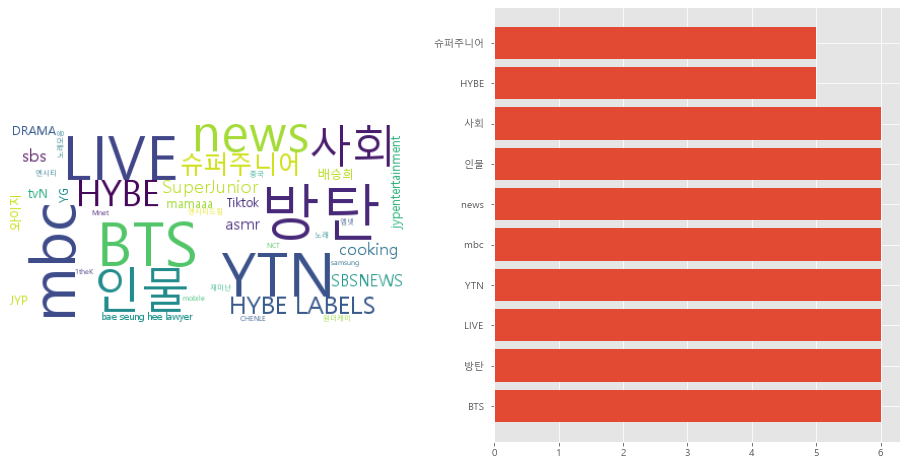

2021 하반기


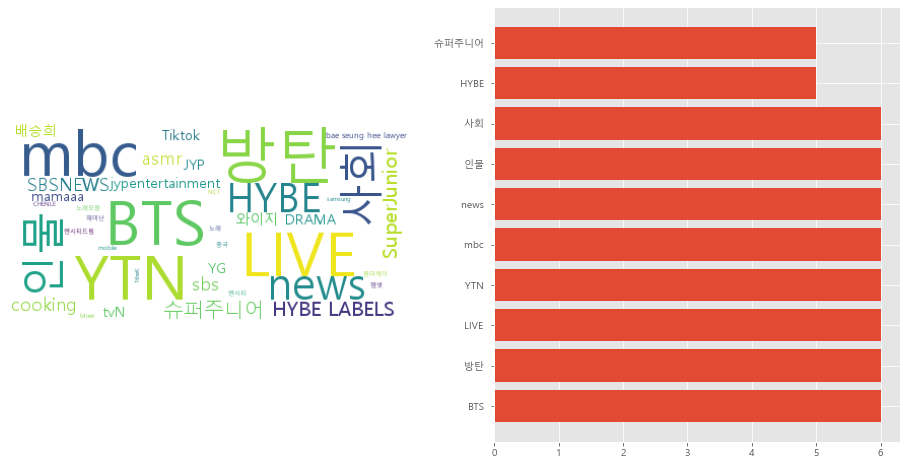

2022 상반기


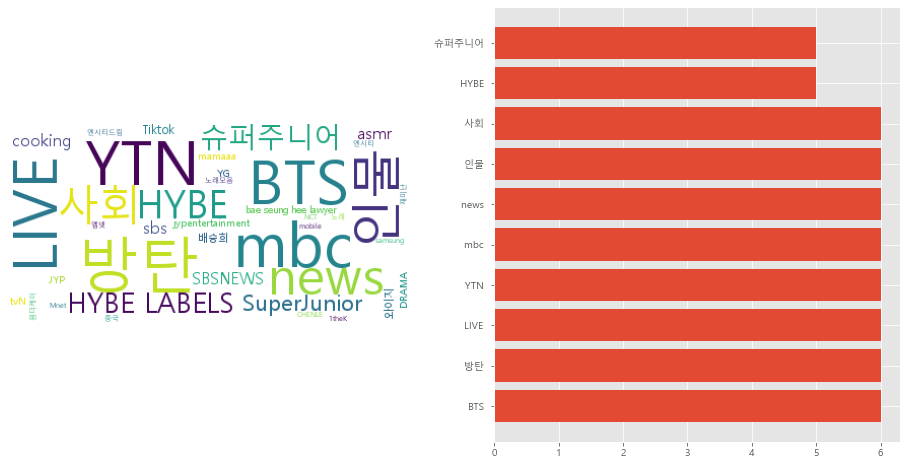

In [264]:
from wordcloud import WordCloud
if platform.system() == 'Windows':
    path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    path = r'/System/Library/Fonts/AppleGothic'
else:
    path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

times = ['2021 상반기', '2021 하반기', '2022 상반기']
q_tags = [month_tags[:6].sum(), month_tags[6:12].sum(), month_tags[12:].sum()]
for i in range(3):
    print(times[i])
    tag_counts = dict(pd.Series(q_tags[0]).str.lstrip(' #').value_counts())

    wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(tag_counts)
    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    
    plt.axis('off')    
    plt.imshow(cloud)
    plt.subplot(1,2,2)
    plt.barh(list(tag_counts.keys())[:10], list(tag_counts.values())[:10])
    plt.show()